# Project 4 : Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import random

random.seed(42)

## Dataset 1

## Dataset 2: Boston Housing Dataset

In [2]:
housing_df = pd.read_csv("housing_data.csv", names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2(a)

In [29]:
housing_df_train_X = housing_df.drop(['MEDV'], axis=1)
housing_df_train_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
housing_df_train_Y = housing_df[['MEDV']]
housing_df_train_Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
mod = sm.OLS(housing_df_train_Y, housing_df_train_X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:01:37   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.0

(506, 13)
[3.872447917865735, 5.727523422258135, 4.195196917463274, 4.834131459135343, 5.9289588153184845, 4.376744068394966, 4.913319148699763, 4.421279503065314, 4.502016662188997, 5.158307445655851]
('Average RMSE: ', 4.792992536004586)


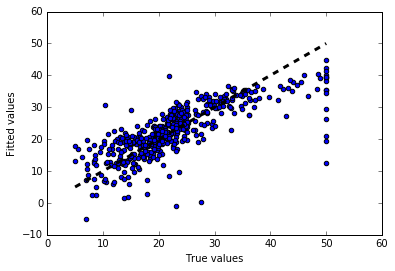

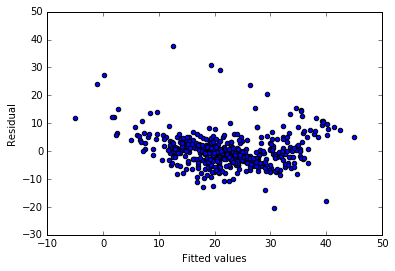

In [27]:
reg = LinearRegression(normalize=True)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

kf.get_n_splits(housing_df_train_X)

print housing_df_train_X.shape

rmse = list()
for train_index, test_index in kf.split(housing_df_train_X):
    reg.fit(housing_df_train_X.iloc[train_index],housing_df_train_Y.iloc[train_index])
    housing_df_predicted_Y = reg.predict(housing_df_train_X.iloc[test_index])
    rmse.append(np.sqrt(mean_squared_error(housing_df_predicted_Y, housing_df_train_Y.iloc[test_index])))
print (rmse)
print("Average RMSE: ", np.average(rmse))

housing_df_predicted_Y = cross_val_predict(reg, housing_df_train_X, housing_df_train_Y, cv=10)

fig, ax = plt.subplots()
ax.scatter(x=housing_df_train_Y, y= housing_df_predicted_Y)
ax.plot([housing_df_train_Y.min(), housing_df_train_Y.max()], [housing_df_train_Y.min(), housing_df_train_Y.max()],  'k--', lw=3)
ax.set_xlabel('True values')
ax.set_ylabel('Fitted values')
plt.show()


housing_df_residual_Y = housing_df_train_Y - housing_df_predicted_Y
fig, ax = plt.subplots()
ax.scatter(housing_df_predicted_Y, housing_df_residual_Y)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
plt.show()

In [35]:
# Ridge regression
Alpha = [1,0.1,0.01,0.001]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(housing_df_train_X)

print housing_df_train_X.shape

for alpha in Alpha:
    rmse = list()
    for train_index, test_index in kf.split(housing_df_train_X):
        ridge = Ridge(normalize=True, alpha = alpha)
        ridge.fit(housing_df_train_X.iloc[train_index],housing_df_train_Y.iloc[train_index])
        housing_df_predicted_Y = ridge.predict(housing_df_train_X.iloc[test_index])
        rmse.append(np.sqrt(mean_squared_error(housing_df_predicted_Y, housing_df_train_Y.iloc[test_index])))
    print (rmse)
    print("Average RMSE: ", np.average(rmse))

print "----------"

for alpha in Alpha:
    ridge = RidgeCV(normalize=True,alphas=[alpha], cv=10)
    ridge.fit(housing_df_train_X, housing_df_train_Y)
    housing_df_predicted_Y = ridge.predict(housing_df_train_X)
    print np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y))

ridge = RidgeCV(normalize=True,alphas=Alpha, cv=10)
ridge.fit(housing_df_train_X, housing_df_train_Y)
housing_df_predicted_Y = ridge.predict(housing_df_train_X)

print "Best Alpha value for Ridge Regression : " + str(ridge.alpha_)
print 'Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y))


(506, 13)
[4.244303967913415, 6.21210564372675, 5.322073367802636, 5.521959889997004, 6.535385284140871, 5.683875527272805, 5.863411757061045, 5.525798436777132, 5.445690040352643, 5.4407254298247985]
('Average RMSE: ', 5.5795329344869105)
[3.8091566182264276, 5.8592949009973525, 4.388430405714157, 4.801712030438955, 6.050651438289825, 4.495273965307879, 5.070108883157557, 4.377456546005831, 4.48169742308738, 5.092469911248388]
('Average RMSE: ', 4.842625212247375)
[3.8560466754453655, 5.748181107203951, 4.218401241726072, 4.816033487954131, 5.947972848919888, 4.376078872449082, 4.929578421939491, 4.394306390792238, 4.475851827676898, 5.14383635594717]
('Average RMSE: ', 4.79062872300543)
[3.8705073616835013, 5.7296904012668435, 4.197543585380039, 4.8319127448856305, 5.9309821344485485, 4.376175862533, 4.914866751314421, 4.418047326152296, 4.498713002537471, 5.156649338488097]
('Average RMSE: ', 4.792508850868985)
----------
4.695151993608747
4.679573505950084
4.679195573192363
4.67919

In [36]:
# Lasso Regression

Alpha = [10, 1,0.1,0.01,0.001,0.0005, 0.0001]


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(housing_df_train_X)

print housing_df_train_X.shape

for alpha in Alpha:
    rmse = list()
    for train_index, test_index in kf.split(housing_df_train_X):
        lasso = Lasso(normalize=True, alpha = alpha)
        lasso.fit(housing_df_train_X.iloc[train_index],housing_df_train_Y.iloc[train_index])
        housing_df_predicted_Y = lasso.predict(housing_df_train_X.iloc[test_index])
        rmse.append(np.sqrt(mean_squared_error(housing_df_predicted_Y, housing_df_train_Y.iloc[test_index])))
    print (rmse)
    print("Average RMSE: ", np.average(rmse))

print "----------"

for alpha in Alpha:
    lasso = LassoCV(normalize=True, alphas=[alpha], cv=10)
    lasso.fit(housing_df_train_X,housing_df_train_Y)
    housing_df_predicted_Y = lasso.predict(housing_df_train_X)
    print np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y))
    print "score:" + str(lasso.score(housing_df_train_X, housing_df_train_Y))
    
lasso = LassoCV(normalize=True, alphas = Alpha, cv=10)
lasso.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = lasso.predict(housing_df_train_X)
print "score:" + str(lasso.score(housing_df_train_X, housing_df_train_Y))

print "Best Alpha value for Lasso Regularization : " + str(lasso.alpha_)
print 'Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y))

(506, 13)
[8.062755503617616, 9.188767033037271, 8.834859102210826, 9.077410674464076, 9.862232874662878, 9.737938464491101, 10.177710171430562, 9.820694587172296, 8.841613826607915, 8.146698331106961]
('Average RMSE: ', 9.175068056880152)
[8.062755503617616, 9.188767033037271, 8.834859102210826, 9.077410674464076, 9.862232874662878, 9.737938464491101, 10.177710171430562, 9.820694587172296, 8.841613826607915, 8.146698331106961]
('Average RMSE: ', 9.175068056880152)
[4.683947382964237, 6.423035952997043, 5.742788231229351, 5.793562616211027, 6.539146583229234, 5.9951472934703895, 6.286883668022519, 6.1233236445565655, 5.586722147200121, 5.724700534960138]
('Average RMSE: ', 5.889925805484062)
[3.9987950549619415, 6.0684275601135695, 4.578790317941074, 4.87895166717999, 6.089443577108721, 4.739405042790576, 5.2305343447569514, 4.384952968845454, 4.29925890175156, 5.2890873870349315]
('Average RMSE: ', 4.955764682248477)
[3.8574980811651103, 5.7441377970464895, 4.213797702439086, 4.818827

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

## Dataset 3

In [56]:
insurance_df = pd.read_csv("insurance_data.csv")
X = insurance_df.select_dtypes(include=[object])

In [51]:
print X.shape
print X.columns


(1338, 3)
Index([u'ft4', u'ft5', u'ft6'], dtype='object')


In [52]:
label_encoder = LabelEncoder()
integer_encoded = X.apply(label_encoder.fit_transform)
integer_encoded.head()

,ft4,ft5,ft6
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [53]:
# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(integer_encoded)

# 3. Transform
onehotlabels = enc.transform(integer_encoded).toarray()
onehotlabels.shape

(1338, 8)

In [72]:
train_Y = np.array(insurance_df['charges'])
print train_Y.shape

train_X = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
print train_X

nc = np.concatenate((train_X, onehotlabels), axis=1)

(1338,)
[[19.   27.9   0.  ]
 [18.   33.77  1.  ]
 [28.   33.    3.  ]
 ...
 [18.   36.85  0.  ]
 [21.   25.8   0.  ]
 [61.   29.07  0.  ]]
[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]


In [73]:
mod = sm.OLS(train_Y, nc)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:15:04   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           256.8564     11.899     21.587      0.0

In [78]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(train_X)
print standard_X.shape

nc = np.concatenate((standard_X, onehotlabels), axis=1)
mod = sm.OLS(train_Y, nc)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

(1338, 3)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:17:56   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3607.4727    167.116     21.58

In [100]:
ft1 = np.array(insurance_df['ft1'])
ft23 = np.array(insurance_df[['ft2', 'ft3']])
new_ft1 = list()
print ft1

for val in ft1:
    if val < 30:
        new_ft1.append([1])
    elif val > 50:
        new_ft1.append([3])
    else:
        new_ft1.append([2])
        
nc = np.concatenate((new_ft1,ft23, onehotlabels), axis=1)
print nc.shape

[19 18 28 ... 18 21 61]
(1338, 11)
